# Time Series Analysis for Seasonality

In [14]:
import pandas as pd

df = pd.read_csv('fashion_retail_sales_cleaned.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      3400 non-null   int64  
 1   item_purchased   3400 non-null   object 
 2   purchase_amount  3400 non-null   float64
 3   purchase_date    3400 non-null   object 
 4   review_rating    3400 non-null   float64
 5   payment_method   3400 non-null   object 
 6   month            3400 non-null   int64  
 7   year             3400 non-null   int64  
 8   day_of_week      3400 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 239.2+ KB


In [16]:
# aggregrate by day, week, month, year
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
df.set_index('purchase_date', inplace=True)
df_daily = df.resample('D').sum()
df_weekly = df.resample('W').sum()
df_monthly = df.resample('M').sum()
df_yearly = df.resample('Y').sum()

C:\Users\kweku\AppData\Local\Temp\ipykernel_3608\4013309605.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').sum()
C:\Users\kweku\AppData\Local\Temp\ipykernel_3608\4013309605.py:7: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = df.resample('Y').sum()


In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

### Daily analysis

<Figure size 2500x800 with 0 Axes>

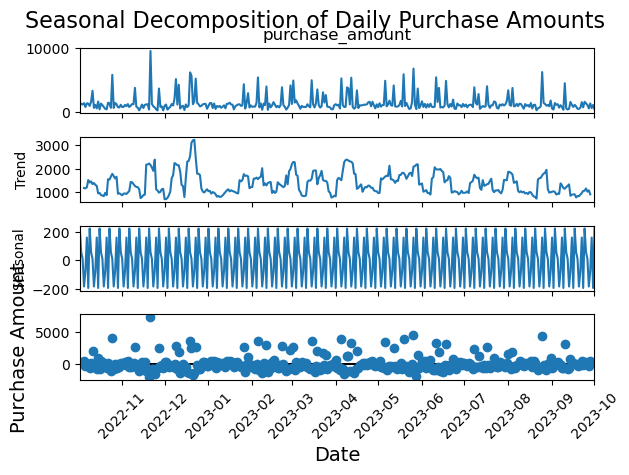

In [18]:
# Decompose the time series
result = seasonal_decompose(
    df_daily['purchase_amount'], model='additive', period=7)

# Plot the decomposition
plt.figure(figsize=(25, 8))
result.plot()
plt.suptitle('Seasonal Decomposition of Daily Purchase Amounts', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Purchase Amount', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
# plt.savefig('seasonal_decomposition_daily.png')
plt.show()

<Figure size 1500x800 with 0 Axes>

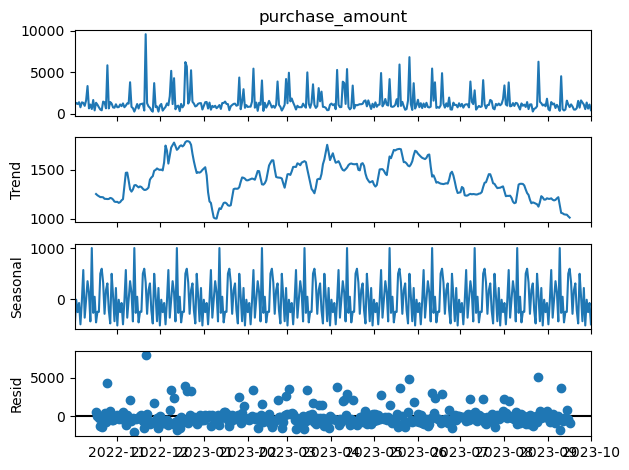

In [19]:
result = seasonal_decompose(
    df_daily['purchase_amount'], model='additive', period=30)

# Plot the decomposition
plt.figure(figsize=(15, 8))
result.plot()
plt.show()

### Weekly analysis

<Figure size 1500x800 with 0 Axes>

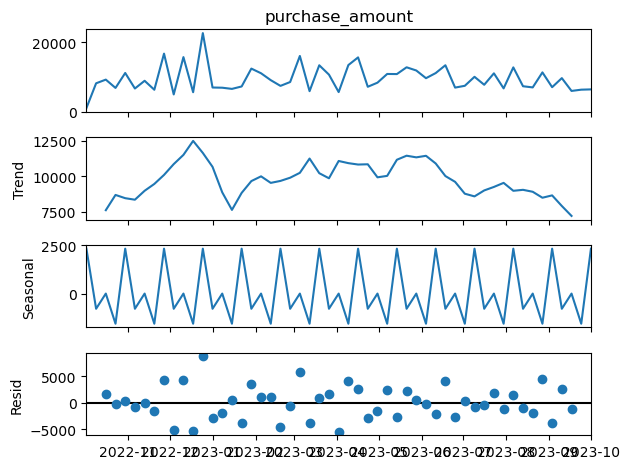

In [20]:
result = seasonal_decompose(df_weekly['purchase_amount'], model='additive', period=4)

plt.figure(figsize=(15, 8))
result.plot()
plt.show()

<Figure size 1500x800 with 0 Axes>

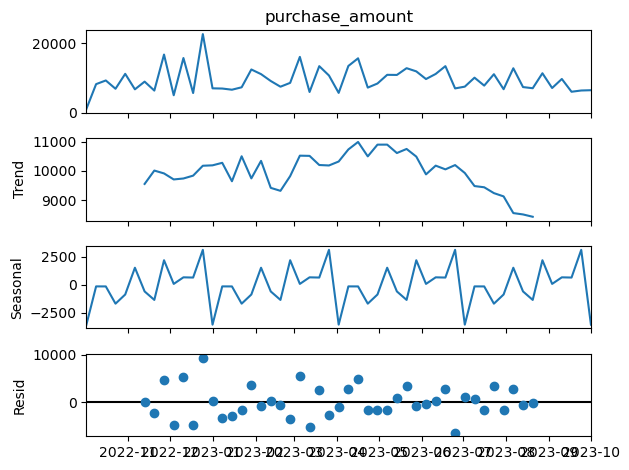

In [21]:
result = seasonal_decompose(
    df_weekly['purchase_amount'], model='additive', period=13)

plt.figure(figsize=(15, 8))
result.plot()
plt.show()

### Monthly analysis

<Figure size 1500x800 with 0 Axes>

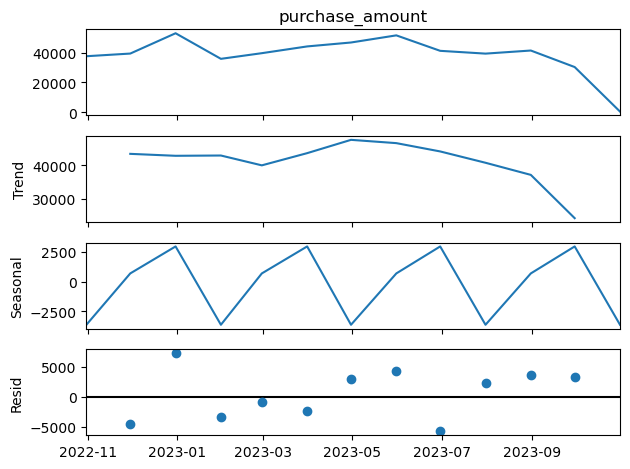

In [22]:
result = seasonal_decompose(
    df_monthly['purchase_amount'], model='additive', period=3)

plt.figure(figsize=(15, 8))
result.plot()
plt.show()